## Membaca Dataset

Pengumpulan data diambil dari sumber :

1. openphish.com
2. phishtank.org
3. facebook.com
4. dan beberapa sumber lainnya yang ada di internet

In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head(20)

,url,status
0,www.facebook.com/photo/?fbid=2334005530108574&...,Legitimate
1,https://zabgc.ru/file/Plan/Santander/Particula...,Phishing
2,www.babla.co.id/bahasa-inggris-bahasa-indonesi...,Legitimate
3,https://xplusstore.com/cig-bin/lt/3mail@b.c,Phishing
4,tinyurl.com/photo-sayas,Legitimate
5,https://www--wellsfargo--com--yy49329d48d6c.ws...,Phishing
6,scontent.fkno6-1.fna.fbcdn.net/v/t39.30808-6/3...,Legitimate
7,https://www--wellsfargo--com--yw49329d48d6c.ws...,Phishing
8,https://openphish.com/whatsnew.html,Legitimate
9,https://www--wellsfargo--com--wn49329d48d6c.ws...,Phishing


In [2]:
df.describe()

,url,status
count,786,786
unique,786,2
top,www.facebook.com/photo/?fbid=2334005530108574&...,Legitimate
freq,1,393


# Melihat distribusi kategori URL status

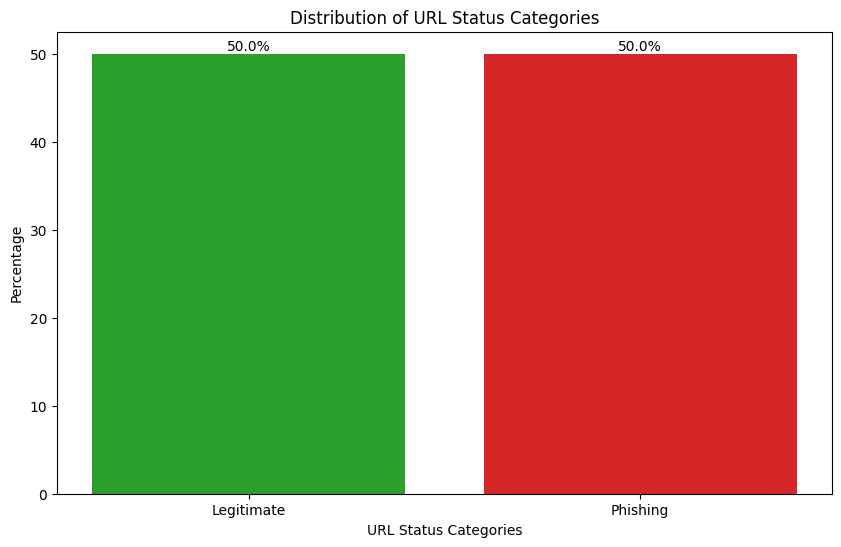

In [3]:
import matplotlib.pyplot as plt

status_counts = df['status'].value_counts()
total = status_counts.sum()

percentages = status_counts / total * 100
colors = ['#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(status_counts.index, percentages, color=colors)

ax.set_xlabel('URL Status Categories')
ax.set_ylabel('Percentage')

for i, p in enumerate(ax.patches):
    percentage = f'{percentages.values[i]:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

ax.set_title('Distribution of URL Status Categories')
plt.show()

# Normalisasi Dataset

# 1.Normalisasi ssl(http/https) contohnya bit.ly/LostSagaOrigin_SubscribeNow --> <span style="color:green">https://</span>bit.ly/LostSagaOrigin_SubscribeNow

In [4]:
import requests

# Normalisasi ssl(http/https)
def normalize_protocol_url(url):
    if url.startswith('http://'):
        url = url[7:]
    elif url.startswith('https://'):
        url = url[8:]

    try:
        response = requests.get('https://' + url)
        if response.status_code == 200:
            return 'https://' + url
    except (requests.exceptions.SSLError, requests.exceptions.RequestException):
        pass

    return 'http://' + url

df['normalisasi_protokol'] = df['url'].apply(normalize_protocol_url)

# 2. Normalisasi Url Asli contohnya https://bit.ly/LostSagaOrigin_SubscribeNow --> <span style="color:red">redirect to </span>--> <span style="color:green">https://www.youtube.com/channel/UCv2POqB76iTckP4TVPl3qmQ</span>

In [5]:
# Normalisasi Url Asli
def normalize_url_actual(normalisasi_protokol):
    original_url = normalisasi_protokol

    try:
        response = requests.head(normalisasi_protokol, allow_redirects=True)
        normalisasi_protokol = response.url
    except requests.exceptions.RequestException:
        normalisasi_protokol = original_url

    return normalisasi_protokol

df['url_asli'] = df['normalisasi_protokol'].apply(normalize_url_actual)

In [6]:
df.head(20)

,url,status,normalisasi_protokol,url_asli
0,www.facebook.com/photo/?fbid=2334005530108574&...,Legitimate,https://www.facebook.com/photo/?fbid=233400553...,https://www.facebook.com/photo/?fbid=233400553...
1,https://zabgc.ru/file/Plan/Santander/Particula...,Phishing,http://zabgc.ru/file/Plan/Santander/Particular...,http://zabgc.ru/file/Plan/Santander/Particular...
2,www.babla.co.id/bahasa-inggris-bahasa-indonesi...,Legitimate,http://www.babla.co.id/bahasa-inggris-bahasa-i...,https://www.babla.co.id/bahasa-inggris-bahasa-...
3,https://xplusstore.com/cig-bin/lt/3mail@b.c,Phishing,https://xplusstore.com/cig-bin/lt/3mail@b.c,https://xplusstore.com/cig-bin/lt/3mail@b.c
4,tinyurl.com/photo-sayas,Legitimate,https://tinyurl.com/photo-sayas,https://www.facebook.com/photo?fbid=2381004508...
5,https://www--wellsfargo--com--yy49329d48d6c.ws...,Phishing,https://www--wellsfargo--com--yy49329d48d6c.ws...,https://www--wellsfargo--com--yy49329d48d6c.ws...
6,scontent.fkno6-1.fna.fbcdn.net/v/t39.30808-6/3...,Legitimate,http://scontent.fkno6-1.fna.fbcdn.net/v/t39.30...,https://scontent.fkno6-1.fna.fbcdn.net/v/t39.3...
7,https://www--wellsfargo--com--yw49329d48d6c.ws...,Phishing,https://www--wellsfargo--com--yw49329d48d6c.ws...,https://www--wellsfargo--com--yw49329d48d6c.ws...
8,https://openphish.com/whatsnew.html,Legitimate,https://openphish.com/whatsnew.html,https://openphish.com/whatsnew.html
9,https://www--wellsfargo--com--wn49329d48d6c.ws...,Phishing,https://www--wellsfargo--com--wn49329d48d6c.ws...,https://www--wellsfargo--com--wn49329d48d6c.ws...


# Menyimpan dataset normalisasi

#
dikarenakan kita hanya menggunakan hasil dari url_asli dan status untuk melakukan ektraksi fitur maka url dan normalisasi_protokol dihapus

In [7]:
# Hapus kolom 'url' dan 'normalisasi'
df.drop(['url', 'normalisasi_protokol'], axis=1, inplace=True)

# Simpan dataframe hasilnya ke file lain
df.to_csv('normalisasi.csv', index=False)